- Khi chuyển từ ảnh màu sang ảnh xám ta có thể dùng công thức: 
>$x = r * 0.299 + g * 0.587 + b * 0.114$

- Với mỗi phần tử $x_{ij}$ trong ma trận X lấy ra một ma trận có kích thước bằng kích thước của
kernel W có phần tử $x_{ij}$ làm trung tâm (đây là vì sao kích thước của kernel thường lẻ) gọi là ma trận
A. Sau đó tính tổng các phần tử của phép tính element-wise của ma trận A và ma trận W, rồi viết
vào ma trận kết quả Y.
- convolution với padding=1. Padding=k nghĩa là thêm k vector 0 vào mỗi phía
(trên, dưới, trái, phải) của ma trận. => vector y = vector x
- stride = k  là bắt đầu từ vị trí $x_{11}$ sau đó nhảy k bước theo chiều dọc và ngang cho đến hết ma
trận X. Stride thường dùng để giảm kích thước của ma trận sau phép tính convolution.
- Công thức tổng quát cho phép tính convolution của ma trận X kích thước m * n với kernel kích thước
k * k, stride = s, padding = p ra ma trận Y kích thước $(\frac{m−k +2p}{s}+1) ∗ (\frac{n−k +2p}{s}+1)$.

=> Mục đích của phép tính convolution trên ảnh là làm mờ, làm nét ảnh; xác định các đường;... Mỗi
kernel khác nhau thì phép tính convolution sẽ có ý nghĩa khác nhau.

# OpenCV

In [24]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

## 1. Load image

Text(0.5, 1.0, 'hoa xanh')

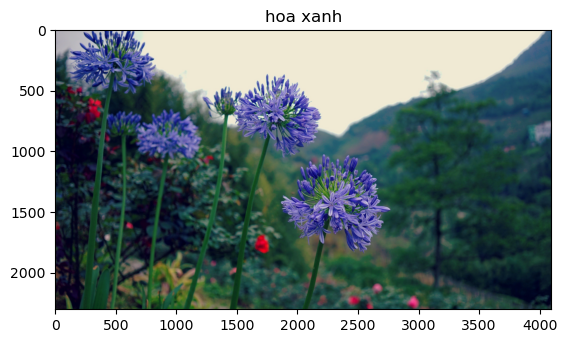

In [3]:
img = cv.imread('hoa xanh.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('hoa xanh')


## 2. Convert to grayscale

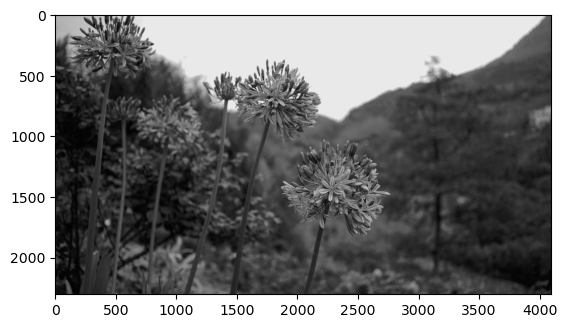

In [4]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

## 3. Resize image

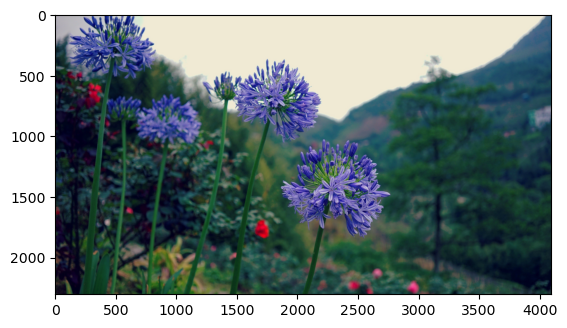

In [5]:
resized_img = cv.resize(img, (200, 100), interpolation=cv.INTER_AREA)
plt.imshow(img)

## 4. Rotate image

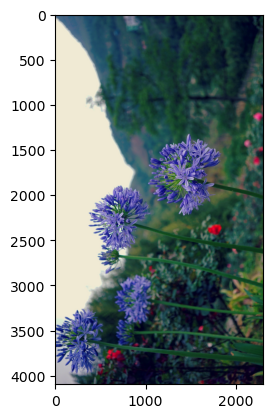

In [6]:
rotated_img = cv.rotate(img, rotateCode= cv.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(rotated_img)

## 5. Threshold

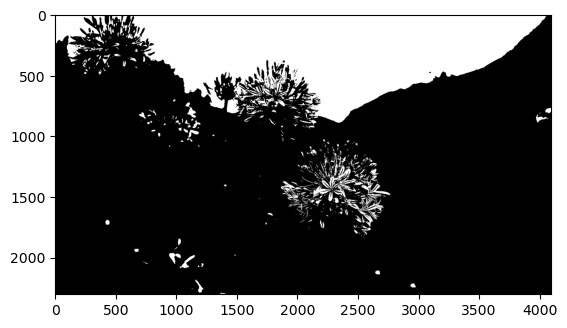

In [7]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray', vmin = 0, vmax = 255)

## 6. Edge detection

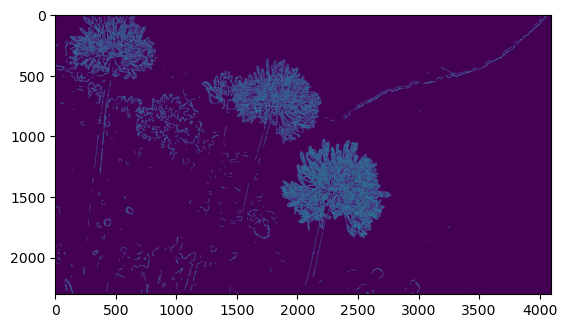

In [19]:
canny = cv.Canny(img, 50, 100)
plt.imshow(canny)

## 7. Line detection

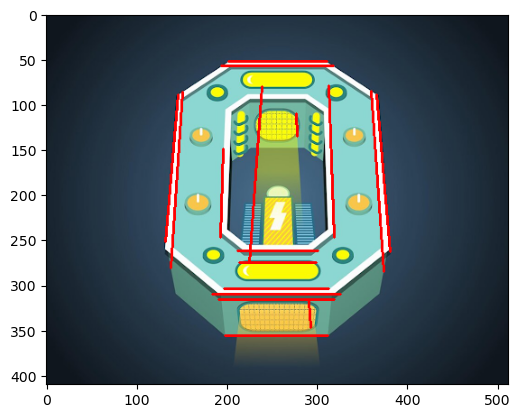

In [25]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
  
# Read image
image = cv2.imread('0.png')

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
  
# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
  
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
      
# Save the result image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## 8. Circle detection

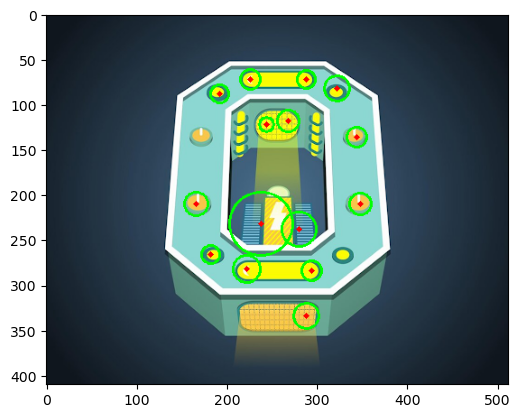

In [23]:
import cv2
import numpy as np

# Read image.
img = cv2.imread('0.png', cv2.IMREAD_COLOR)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
			param2 = 30, minRadius = 1, maxRadius = 40)

# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]

		# Draw the circumference of the circle.
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)

		# Draw a small circle (of radius 1) to show the center.
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img)
else:
    print("No circles found.")
    


## 9. Convolution

In [29]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('hoa xanh.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Perform the convolution
result = cv2.filter2D(image, -1, kernel)

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 10. Convolution on color image

In [30]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('hoa xanh.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Perform convolution on each color channel
result_channels = []
for channel in cv2.split(image):
    conv_channel = cv2.filter2D(channel, -1, kernel)
    result_channels.append(conv_channel)

# Merge the convolved color channels
result = cv2.merge(result_channels)

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 11. Convolution with padding and stride

In [35]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('hoa xanh.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Define padding and stride parameters
padding = 1
stride = 2

# Add padding to the image
image_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT)

# Calculate the output dimensions
output_height = (image.shape[0] + 2 * padding - kernel.shape[0]) // stride + 1
output_width = (image.shape[1] + 2 * padding - kernel.shape[1]) // stride + 1

# Create an empty output image
output = np.zeros((output_height, output_width), dtype=np.float32)

# Perform convolution with padding and stride
for i in range(0, output_height):
    for j in range(0, output_width):
        image_patch = image_padded[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]]
        conv_result = np.sum(image_patch * kernel)
        output[i, j] = conv_result

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

